In [1]:
%cd ../

/home/users/dmoreno2016/ATAT


In [14]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import numpy as np

from utils import get_metrics, plot_values_times, plot_result_ablation, f1_values

#plt.rcParams.update({
#    "text.usetex": True,
#    "font.family": "sans-serif",
#    "font.sans-serif": ["Helvetica"]})
## for Palatino and other serif fonts use:
#plt.rcParams.update({
#    "text.usetex": True,
#    "font.family": "serif",
#    "font.serif": ["Palatino"],
#})

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Evaluating performance over time

In [15]:
name_file_results = 'results_paper'

list_eval_time = ['0001', '0002', '0004', '0008', '0016', '0032', '0064', '0128', '0256', '0512', '1024', '2048']

# Paper results

We extract the F1-score of the Random Forest evaluated on different days

In [16]:
f1_score_mean = []
f1_score_std = []

for eval_time in list_eval_time:
    print('F1-score eval time {}'.format(eval_time))
    f1_by_folds = np.load('./results_rf_paper/{}_days/full_lc_stats.npy'.format(eval_time))[2][2]
    f1_score_mean.append(f1_by_folds.mean())
    f1_score_std.append(f1_by_folds.std())

f1_added = {
    'mean': np.array(f1_score_mean),
    'std': np.array(f1_score_std)
}

f1_added

F1-score eval time 0001
F1-score eval time 0002
F1-score eval time 0004
F1-score eval time 0008
F1-score eval time 0016
F1-score eval time 0032
F1-score eval time 0064
F1-score eval time 0128
F1-score eval time 0256
F1-score eval time 0512
F1-score eval time 1024
F1-score eval time 2048


{'mean': array([0.55250026, 0.55842677, 0.57126641, 0.59158015, 0.62659365,
        0.69230776, 0.7493823 , 0.78197758, 0.78782641, 0.7937164 ,
        0.79424296, 0.79428115]),
 'std': array([0.00150503, 0.00116799, 0.00110926, 0.00144945, 0.00144386,
        0.00142532, 0.00103179, 0.00091846, 0.00095021, 0.00080216,
        0.00080825, 0.00079515])}

In [17]:
colors = {
    'ATAT (LC)': '#999999',
    'ATAT (LC + MTA)': '#999999',
    'ATAT (Features)': '#ff7f00',
    'ATAT (Features + MTA)': '#ff7f00',
    'ATAT (Features + MD)': '#984ea3',
    'ATAT (Features + MD + MTA)': '#984ea3',
    'ATAT (MD)': '#17BECF',
    'ATAT (LC + MD)': '#4daf4a',
    'ATAT (LC + MD + MTA)': '#4daf4a',
    'ATAT (LC + MD + Features)': '#377eb8',
    'ATAT (LC + MD + Features + MTA)': '#377eb8',
}

In [18]:
f1_lc_header_mtime, _, _, _ = get_metrics(list_path_predictions='{}/lc_tab/Exp_cfg_-arch=lc_header_mtime-seed=*'.format(name_file_results))
f1_lc_header_feat_mtime, _, _, _ = get_metrics(list_path_predictions='{}/lc_tab/Exp_cfg_-arch=lc_header_feat_mtime-seed=*'.format(name_file_results))

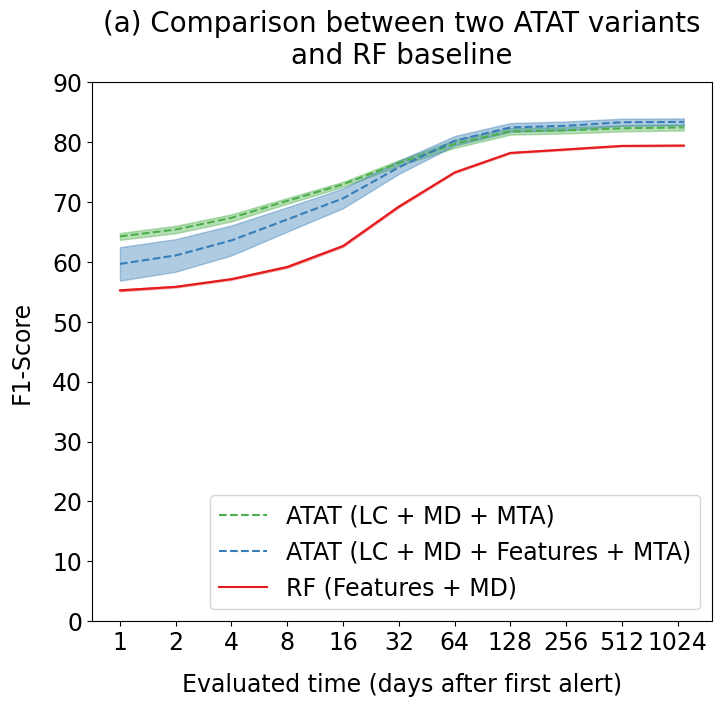

In [19]:
list_eval_time = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 1105]
models_f1_results_time = {
    'ATAT (LC + MD + MTA)': f1_lc_header_mtime,
    'ATAT (LC + MD + Features + MTA)': f1_lc_header_feat_mtime,
}

title = '(a) Comparison between two ATAT variants\nand RF baseline'
plot_values_times(list_eval_time, models_f1_results_time, title, colors=colors, f1_added=f1_added)

## Plot 1

In [20]:
f1_lc, _, _, _ = get_metrics(list_path_predictions='{}/lc/Exp_cfg_-arch=lc-seed=*'.format(name_file_results))
f1_lc_mtime, _, _, _ = get_metrics(list_path_predictions='{}/lc/Exp_cfg_-arch=lc_mtime-seed=*'.format(name_file_results))

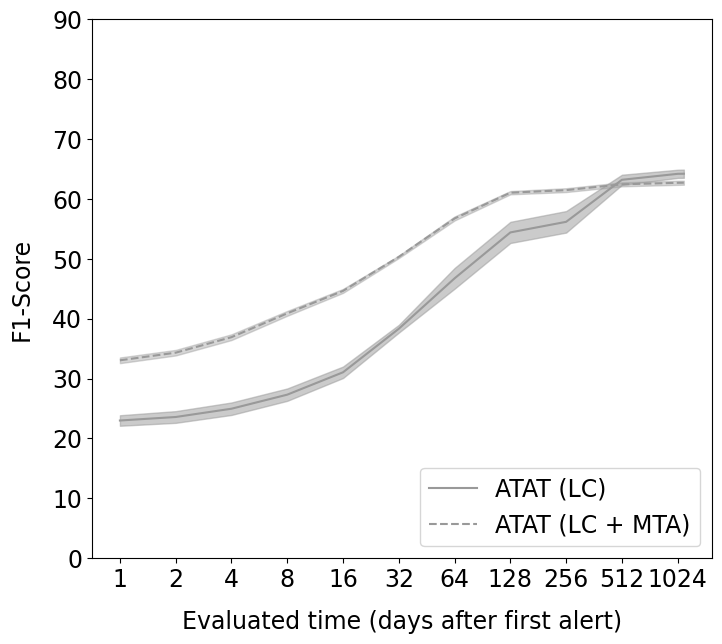

In [21]:
list_eval_time = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 1105]
models_f1_results_time = {
    'ATAT (LC)': f1_lc,
    'ATAT (LC + MTA)': f1_lc_mtime,
}

plot_values_times(list_eval_time, models_f1_results_time, colors=colors)

## Plot 2

In [22]:
f1_features, _, _, _ = get_metrics(list_path_predictions='{}/tab/Exp_cfg_-arch=features-seed=*'.format(name_file_results))
f1_features_mtime, _, _, _ = get_metrics(list_path_predictions='{}/tab/Exp_cfg_-arch=features_mtime-seed=*'.format(name_file_results))
f1_header_feat, _, _, _ = get_metrics(list_path_predictions='{}/tab/Exp_cfg_-arch=header_feat-seed=*'.format(name_file_results))
f1_header_feat_mtime, _, _, _ = get_metrics(list_path_predictions='{}/tab/Exp_cfg_-arch=header_feat_mtime-seed=*'.format(name_file_results))
f1_header, _, _, _ = get_metrics(list_path_predictions='{}/tab/Exp_cfg_-arch=header-seed=*'.format(name_file_results))

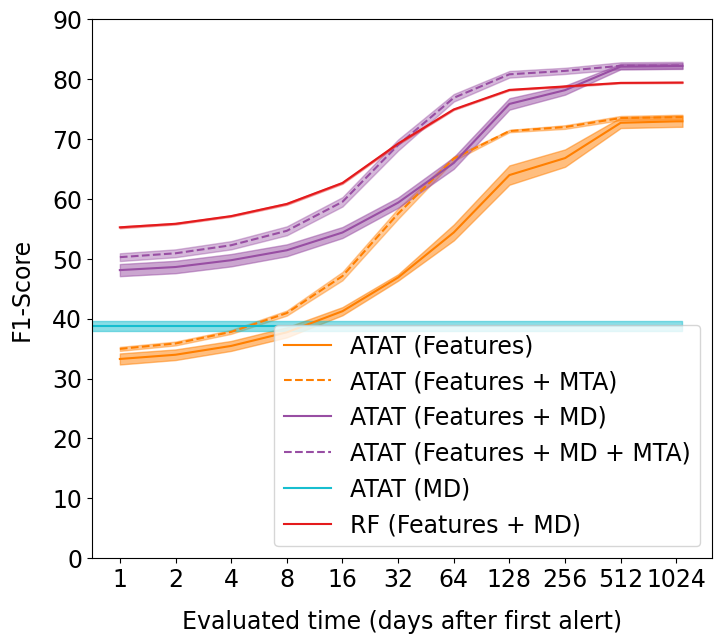

In [23]:
list_eval_time = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 1105]
models_f1_results_time = {
    'ATAT (Features)': f1_features,
    'ATAT (Features + MTA)': f1_features_mtime,
    'ATAT (Features + MD)': f1_header_feat,
    'ATAT (Features + MD + MTA)': f1_header_feat_mtime,
    'ATAT (MD)': f1_header,
}

plot_values_times(list_eval_time, models_f1_results_time, colors=colors, f1_added=f1_added)

## Plot 3

In [24]:
f1_lc_header, _, _, _ = get_metrics(list_path_predictions='{}/lc_tab/Exp_cfg_-arch=lc_header-seed=*'.format(name_file_results))
f1_lc_header_mtime, _, _, _ = get_metrics(list_path_predictions='{}/lc_tab/Exp_cfg_-arch=lc_header_mtime-seed=*'.format(name_file_results))
f1_lc_header_feat, _, _, _ = get_metrics(list_path_predictions='{}/lc_tab/Exp_cfg_-arch=lc_header_feat-seed=*'.format(name_file_results))
f1_lc_header_feat_mtime, _, _, _ = get_metrics(list_path_predictions='{}/lc_tab/Exp_cfg_-arch=lc_header_feat_mtime-seed=*'.format(name_file_results))

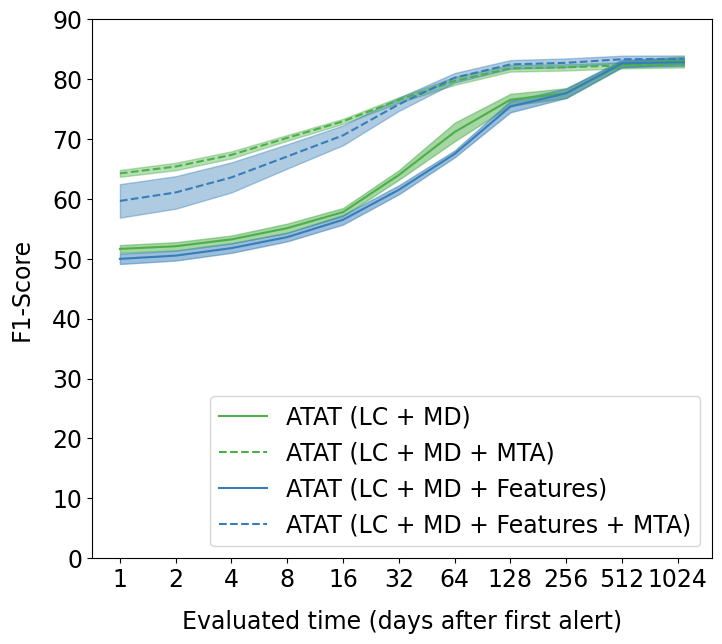

In [25]:
list_eval_time = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 1105]
models_f1_results_time = {
    'ATAT (LC + MD)': f1_lc_header,
    'ATAT (LC + MD + MTA)': f1_lc_header_mtime,
    'ATAT (LC + MD + Features)': f1_lc_header_feat,
    'ATAT (LC + MD + Features + MTA)': f1_lc_header_feat_mtime,
}

plot_values_times(list_eval_time, models_f1_results_time, colors=colors)

## Joint plot

In [26]:
list_eval_time = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]

models_f1_results_time = {
    'ATAT (LC)': f1_lc,
    'ATAT (LC + MTA)': f1_lc_mtime,
    'ATAT (Features)': f1_features,
    'ATAT (Features + MTA)': f1_features_mtime,
    'ATAT (Features + MD)': f1_header_feat,
    'ATAT (Features + MD + MTA)': f1_header_feat_mtime,
    'ATAT (MD)': f1_header,
    'ATAT (LC + MD)': f1_lc_header,
    'ATAT (LC + MD + MTA)': f1_lc_header_mtime,
    'ATAT (LC + MD + Features)': f1_lc_header_feat,
    'ATAT (LC + MD + Features + MTA)': f1_lc_header_feat_mtime,
}

In [27]:
dict_mean, dict_std = f1_values(list_eval_time, models_f1_results_time)

In [28]:
order_models = [['ATAT (LC)', 'ATAT (LC + MTA)'], 
                ['ATAT (Features)', 'ATAT (Features + MTA)', 'ATAT (Features + MD)', 'ATAT (Features + MD + MTA)', 'ATAT (MD)'],
                ['ATAT (LC + MD)', 'ATAT (LC + MD + MTA)', 'ATAT (LC + MD + Features)', 'ATAT (LC + MD + Features + MTA)']]

In [29]:
titles = ['(b) Light-curve only ATAT variants\n',
          '(c) Tabular data only ATAT variants\nplus RF baseline',
          '(d) Combined Light-curve and tabular\ndata ATAT variants']

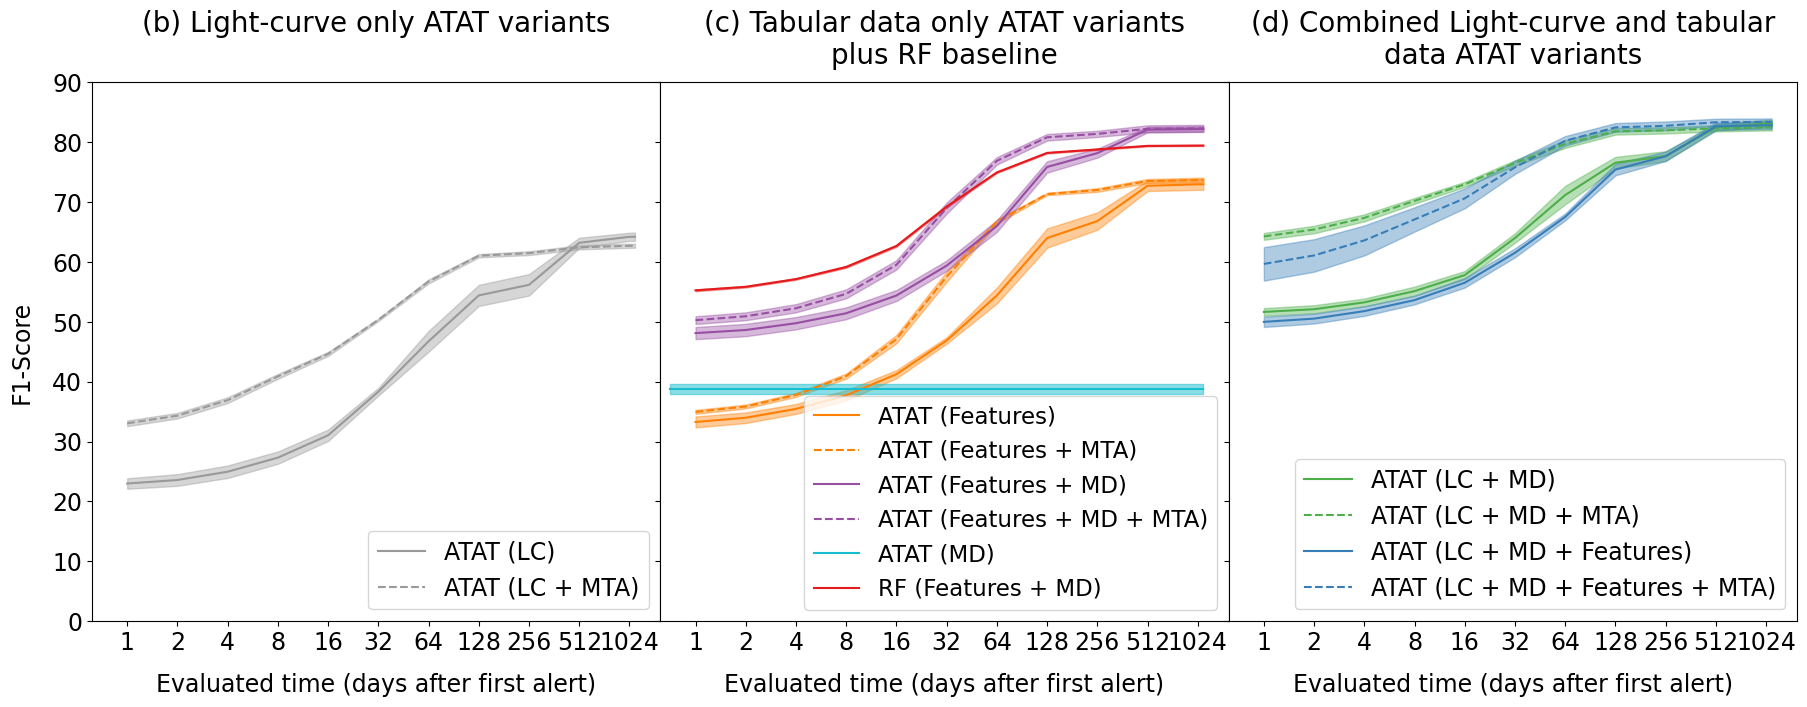

In [31]:
list_eval_time = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 1105]
fs = 17
ylim_min = 0
ylim_max = 90


fig, axes = plt.subplots(1, 3, figsize=(22, 7), sharey=True, gridspec_kw=dict(wspace=0))

for i, models_in_plot in enumerate(order_models):
    axes[i].set_title(titles[i], size=20, pad=13)

    for name_model in models_in_plot:
        list_f1_mean_fold = dict_mean[name_model]
        list_f1_std_fold = dict_std[name_model]

        if name_model.find('MTA') != -1:
            linestyle='dashed'
        else:
            linestyle='-'

        if name_model != 'ATAT (MD)':
            axes[i].plot(np.log(list_eval_time)/np.log(2), list_f1_mean_fold, label=name_model, linestyle=linestyle, color=colors[name_model])
            axes[i].fill_between(np.log(list_eval_time)/np.log(2), 
                                list_f1_mean_fold + list_f1_std_fold, 
                                list_f1_mean_fold - list_f1_std_fold, 
                                alpha=0.4, color=colors[name_model])
        else:
            list_f1_mean_fold = np.insert(list_f1_mean_fold, 0, list_f1_mean_fold[0])
            list_f1_std_fold = np.insert(list_f1_std_fold, 0, list_f1_std_fold[0])
            axes[i].plot(np.log([0.7] + list_eval_time)/np.log(2), list_f1_mean_fold, label=name_model, color=colors[name_model])
            axes[i].fill_between(np.log([0.7] + list_eval_time)/np.log(2), 
                             list_f1_mean_fold + list_f1_std_fold, 
                             list_f1_mean_fold - list_f1_std_fold, 
                             alpha=0.5, color=colors[name_model])
            
        axes[i].tick_params(axis="y", labelsize=fs) 
        axes[i].set_xticks(np.log(list_eval_time[:-1])/np.log(2)) 
        axes[i].set_xticklabels(list_eval_time[:-1], fontsize=fs)

        if i == 0: axes[i].set_ylabel("F1-Score", fontsize=fs, labelpad=13)
        axes[i].set_xlabel("Evaluated time (days after first alert)", fontsize=fs, labelpad=13)
        axes[i].set_ylim((ylim_min, ylim_max))
        axes[i].set_xlim(left=-0.7)
        axes[i].legend(fontsize=fs, loc='lower right')

axes[1].plot(np.log(list_eval_time)/np.log(2), f1_added['mean']*100, label='RF (Features + MD)', linestyle='-', color='#e41a1c')
axes[1].fill_between(np.log(list_eval_time)/np.log(2), 
                     f1_added['mean']*100 + f1_added['std']*100, 
                     f1_added['mean']*100 - f1_added['std']*100, 
                     alpha=0.4, color='#e41a1c')

axes[1].legend(fontsize=16.5, loc='lower right')

#plt.savefig("all_curves_teval_b_c_d_last.pdf", format="pdf", bbox_inches="tight")
plt.show()


## Ablation study

In [36]:
f1_tm_lc, _, _, _ = get_metrics(list_path_predictions='{}/lc/Exp_cfg_-arch=lc_mtime-seed=*'.format(name_file_results))
f1_pe_lc, _, _, _ = get_metrics(list_path_predictions='{}/ablation/Exp_cfg_-arch=lc_pos_enc_mtime-seed=*'.format(name_file_results))

f1_tm_lc_md, _, _, _ = get_metrics(list_path_predictions='{}/ablation/Exp_cfg_-arch=lc_header_mtime_no_qt-seed=*'.format(name_file_results))
f1_pe_lc_md, _, _, _ = get_metrics(list_path_predictions='{}/ablation/Exp_cfg_-arch=lc_header_pos_enc_mtime_no_qt-seed=*'.format(name_file_results))

f1_tm_lc_md_qt, _, _, _ = get_metrics(list_path_predictions='{}/lc_tab/Exp_cfg_-arch=lc_header_mtime-seed=*'.format(name_file_results))
f1_pe_lc_md_qt, _, _, _ = get_metrics(list_path_predictions='{}/ablation/Exp_cfg_-arch=lc_header_pos_enc_mtime-seed=*'.format(name_file_results))

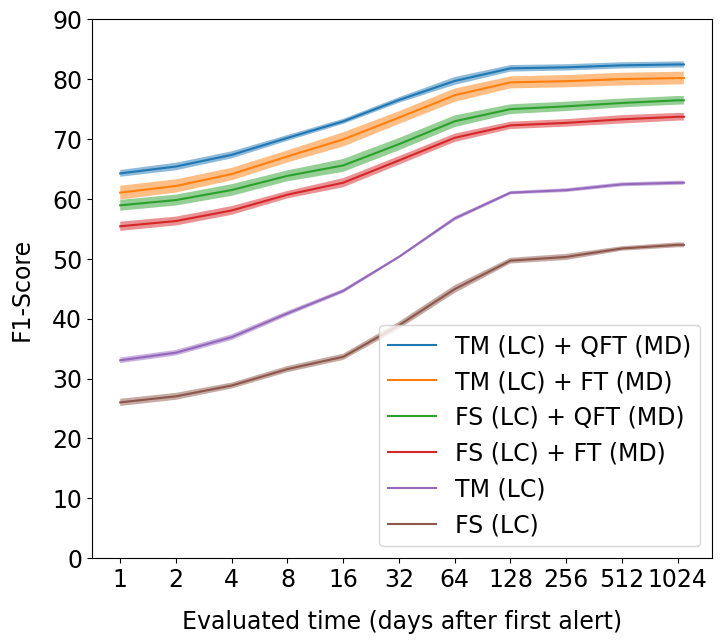

In [38]:
list_eval_time = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 1105]

models_f1_results_time = {
    'TM (LC) + QFT (MD)': f1_tm_lc_md_qt,
    'TM (LC) + FT (MD)': f1_tm_lc_md,
    'FS (LC) + QFT (MD)': f1_pe_lc_md_qt,
    'FS (LC) + FT (MD)': f1_pe_lc_md,
    'TM (LC)': f1_tm_lc,
    'FS (LC)': f1_pe_lc,
}

plot_result_ablation(list_eval_time, models_f1_results_time)